# Comparison of Modell-Fit der WPL13E mit ausführlichen Referenz-Daten
- Daten stammen aus dem Installationshandbuch der Wärmepumpe und weiseneinen breiten Bereich (-20°C bis + 40°C) auf.
- Es werden folgende Fit-Funktionen mit verschiedener Parameter-Anzahl (p1 ... p9) evaluiert
1. **simple**       z = p1x + p2y + p3
2. **complex1**     z = p1x + p2y + p3xy + p4
3. **complex2**     z = doppelt quadratisch mit p1 bis p9

Die Vorgehensweise soll grundsätzlich zeigen, dass sich die Fit-Methoden bei ausreichenden Datenbasis eignen und das es wichtig ist, den COP oder die Heizleistung nicht ausschließlich von der Temperatur-Differenz zwischen Quelle und Senke abhängig zu machen, sondern von den konkreten Quell- und Zieltemperaturen.

Darüber hinaus soll identifiziert werden, welche zwei der vier Variablen  (P_el, P_th, COP, eta) sich am besten/einfachsten/robustesten fitten lassen. Die anderen zwei Variablen lassen sich dann berechnen. 

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
#%matplotlib widget

In [2]:
# Funktion zum fitten
# x=T_in, y=T_out, z=Größe zum fitten

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # Startwerte
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Funktion zum berechnen von z mittels Parametern und belibigen x und y
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

## Import der Referenz-Daten
Mit Hilfe des EngaugeDigitizer wurden die Referenz-Werte der Stiebel Eltron WPL 13 E aus der Grafik in eine CSV überführt.
BEDIENUNG UND INSTALLATION | LUFT/WASSER-WÄRMEPUMPE | WPL 13 cool, WPL 18 cool, WPL 23 cool, WPL 13 E, WPL 18 E, WPL 23 E

In [3]:
# Import data_cred
data_cred = pd.read_csv('heatpump_wpl13_diagramm.csv', delimiter=';', decimal=',')
# Daten vervollständigen, indem COP und Gütagrad (eta) aus errechnet werden
K = 273.15
data_cred['T_in'] = data_cred['T_in'].astype(float)
data_cred['T_out'] = data_cred['T_out'].astype(float)
data_cred['COP'] = data_cred['P_th'] / data_cred['P_el']
eta_carnot = (data_cred['T_out']+K) / ((data_cred['T_out']+K)-(data_cred['T_in']+K))
data_cred['eta'] = data_cred ['COP'] / eta_carnot
data_cred.fillna(0, inplace=True)
data_cred


,T_in,T_out,P_th,P_el,COP,eta
0,-19.8932,35.0,4.4916,2.0880,2.151149,0.383201
1,-19.6797,35.0,4.5276,2.0878,2.168599,0.384807
2,-19.4662,35.0,4.5640,2.0876,2.186243,0.386423
3,-19.3594,35.0,4.5825,2.0875,2.195210,0.387247
4,-19.2794,35.0,4.5964,2.0875,2.201868,0.387850
...,...,...,...,...,...,...
562,39.0925,65.0,13.9126,3.8554,3.608601,0.276474
563,39.2794,65.0,13.9123,3.8537,3.610115,0.274595
564,39.3327,65.0,13.9122,3.8532,3.610557,0.274060
565,39.5996,65.0,13.9118,3.8507,3.612798,0.271378


In [4]:
# Import data_comp
data_comp = pd.read_csv('heatpump_wpl13_keymark.csv', delimiter=';', decimal=',')
# Daten vervollständigen
K = 273.15
data_comp['T_in'] = data_comp['T_in'].astype(float)
data_comp['T_out'] = data_comp['T_out'].astype(float)
data_comp['COP'] = data_comp['P_th'] / data_comp['P_el']
eta_carnot = (data_comp['T_out']+K) / ((data_comp['T_out']+K)-(data_comp['T_in']+K))
data_comp['eta'] = data_comp ['COP'] / eta_carnot
data_comp.fillna(0, inplace=True)
data_comp

,Manufacturer,Name,model,mode,T_in,T_out,P_el,P_th,COP,eta
0,Stiebel Eltron,WPL 13 E,on_off,heating,-15.0,35.0,2.15,5.6,2.604651,0.422627
1,Stiebel Eltron,WPL 13 E,on_off,heating,-7.0,34.0,2.07,6.8,3.285024,0.438502
2,Stiebel Eltron,WPL 13 E,on_off,heating,2.0,30.0,2.01,8.2,4.079602,0.376806
3,Stiebel Eltron,WPL 13 E,on_off,heating,7.0,27.0,1.80,8.5,4.722222,0.314657
4,Stiebel Eltron,WPL 13 E,on_off,heating,12.0,24.0,1.59,8.4,5.283019,0.213348
5,Stiebel Eltron,WPL 13 E,on_off,heating,-15.0,55.0,3.23,6.2,1.919505,0.409463
6,Stiebel Eltron,WPL 13 E,on_off,heating,-7.0,52.0,2.91,6.9,2.371134,0.430253
7,Stiebel Eltron,WPL 13 E,on_off,heating,2.0,42.0,2.68,8.1,3.022388,0.383613
8,Stiebel Eltron,WPL 13 E,on_off,heating,7.0,36.0,2.30,8.4,3.652174,0.342594
9,Stiebel Eltron,WPL 13 E,on_off,heating,12.0,30.0,1.94,8.3,4.278351,0.254034


## Fitten der verschiedenen Größen P_el, P_th, COP und eta

In [5]:
# Daten fitten und vergleichen für P_el
var='P_el'
# simple
vars()[var+'_para_cred'] = fit_simple(data_cred['T_in'],data_cred['T_out'],data_cred[var])
data_cred[var+'_s'] = func_simple(globals()[var+'_para_cred'], data_cred['T_in'], data_cred['T_out'])
data_cred[var+'_s_err'] = (data_cred[var+'_s'] - data_cred[var]) / data_cred[var] * 100
d = {'cred': [data_cred[var+'_s_err'].mean(), data_cred[var+'_s_err'].max(), data_cred[var+'_s_err'].min()]}
vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])


vars()[var+'_para_comp'] = fit_simple(data_comp['T_in'],data_comp['T_out'],data_comp[var])
data_comp[var+'_s'] = func_simple(globals()[var+'_para_comp'], data_comp['T_in'], data_comp['T_out'])
data_comp[var+'_s_err'] = (data_comp[var+'_s'] - data_comp[var]) / data_comp[var] * 100
d = data_comp[var+'_s_err'].mean(), data_comp[var+'_s_err'].max(), data_comp[var+'_s_err'].min()
vars()[var+'_err']['comp'] = d

# Fehler in Prozent
globals()[var+'_err']

,cred,comp
mean,0.082055,0.133107
max,6.422579,4.840765
min,-6.016977,-4.473306


In [6]:
# Daten fitten und vergleichen für P_th
var='P_th'
# simple
vars()[var+'_para_cred'] = fit_simple(data_cred['T_in'],data_cred['T_out'],data_cred[var])
data_cred[var+'_s'] = func_simple(globals()[var+'_para_cred'], data_cred['T_in'], data_cred['T_out'])
data_cred[var+'_s_err'] = (data_cred[var+'_s'] - data_cred[var]) / data_cred[var] * 100
d = {'cred': [data_cred[var+'_s_err'].mean(), data_cred[var+'_s_err'].max(), data_cred[var+'_s_err'].min()]}
vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])


vars()[var+'_para_comp'] = fit_simple(data_comp['T_in'],data_comp['T_out'],data_comp[var])
data_comp[var+'_s'] = func_simple(globals()[var+'_para_comp'], data_comp['T_in'], data_comp['T_out'])
data_comp[var+'_s_err'] = (data_comp[var+'_s'] - data_comp[var]) / data_comp[var] * 100
d = data_comp[var+'_s_err'].mean(), data_comp[var+'_s_err'].max(), data_comp[var+'_s_err'].min()
vars()[var+'_err']['comp'] = d

# Fehler in Prozent
globals()[var+'_err']

,cred,comp
mean,0.047747,0.180845
max,11.374359,5.778127
min,-9.944200,-6.309381


In [7]:
# Daten fitten und vergleichen für COP
var='COP'
# simple
vars()[var+'_para_cred'] = fit_simple(data_cred['T_in'],data_cred['T_out'],data_cred[var])
data_cred[var+'_s'] = func_simple(globals()[var+'_para_cred'], data_cred['T_in'], data_cred['T_out'])
data_cred[var+'_s_err'] = (data_cred[var+'_s'] - data_cred[var]) / data_cred[var] * 100
d = {'cred': [data_cred[var+'_s_err'].mean(), data_cred[var+'_s_err'].max(), data_cred[var+'_s_err'].min()]}
vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])


vars()[var+'_para_comp'] = fit_simple(data_comp['T_in'],data_comp['T_out'],data_comp[var])
data_comp[var+'_s'] = func_simple(globals()[var+'_para_comp'], data_comp['T_in'], data_comp['T_out'])
data_comp[var+'_s_err'] = (data_comp[var+'_s'] - data_comp[var]) / data_comp[var] * 100
d = data_comp[var+'_s_err'].mean(), data_comp[var+'_s_err'].max(), data_comp[var+'_s_err'].min()
vars()[var+'_err']['comp'] = d

# Fehler in Prozent
globals()[var+'_err']

,cred,comp
mean,-0.018841,-0.007696
max,16.773628,9.410783
min,-22.019088,-13.922046


In [8]:
# Daten fitten und vergleichen für eta
var='eta'
# simple
vars()[var+'_para_cred'] = fit_simple(data_cred['T_in'],data_cred['T_out'],data_cred[var])
data_cred[var+'_s'] = func_simple(globals()[var+'_para_cred'], data_cred['T_in'], data_cred['T_out'])
data_cred[var+'_s_err'] = (data_cred[var+'_s'] - data_cred[var]) / data_cred[var] * 100
d = {'cred': [data_cred[var+'_s_err'].mean(), data_cred[var+'_s_err'].max(), data_cred[var+'_s_err'].min()]}
vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])


vars()[var+'_para_comp'] = fit_simple(data_comp['T_in'],data_comp['T_out'],data_comp[var])
data_comp[var+'_s'] = func_simple(globals()[var+'_para_comp'], data_comp['T_in'], data_comp['T_out'])
data_comp[var+'_s_err'] = (data_comp[var+'_s'] - data_comp[var]) / data_comp[var] * 100
d = data_comp[var+'_s_err'].mean(), data_comp[var+'_s_err'].max(), data_comp[var+'_s_err'].min()
vars()[var+'_err']['comp'] = d

# Fehler in Prozent
globals()[var+'_err']

,cred,comp
mean,-13.600930,1.557835
max,6476.229045,29.037715
min,-11200.493919,-9.927472


In [9]:
# Parameter abspeichern
para_wpl13_cred = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_wpl13_comp = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_wpl13_cred['P_el']=P_el_para_cred
para_wpl13_comp['P_el']=P_el_para_comp

para_wpl13_cred['P_th']=P_th_para_cred
para_wpl13_comp['P_th']=P_th_para_comp

para_wpl13_cred['COP']=COP_para_cred
para_wpl13_comp['COP']=COP_para_comp

para_wpl13_cred['eta']=eta_para_cred
para_wpl13_comp['eta']=eta_para_comp

#para_wpl13_cred.to_csv('para_wpl13_cred_diaramm.csv')
#para_wpl13_c1.to_csv('para_wpl13_c1_diagramm.csv')
#para_wpl13_c2.to_csv('para_wpl13_c2_diagramm.csv')
print(para_wpl13_cred)
para_wpl13_comp

        P_el      P_th       COP       eta
p1  0.009957  0.175538  0.048864 -0.004331
p2  0.039390 -0.005326 -0.044713  0.004205
p3  0.911749  8.240180  5.049002  0.171688


,P_el,P_th,COP,eta
p1,0.003105,0.109695,0.051476,-0.005821
p2,0.051870,0.015184,-0.059875,0.000982
p3,0.375374,7.007706,5.717538,0.321569


 ## Vergleich der der Referenz-Daten mit den Ergebnissen der Fit-Funktionen 

Text(0, 0.5, 'eta')

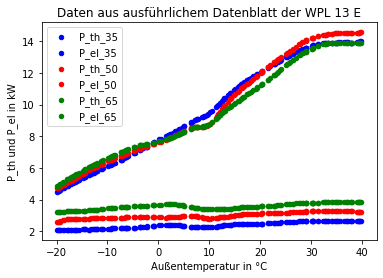

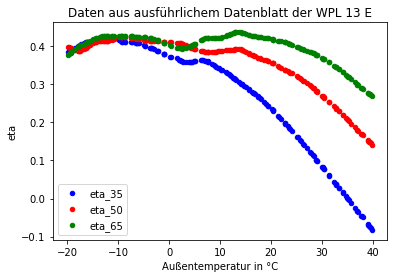

In [10]:
# Plot der Referenz-Daten
data2 = data_cred # Kopie erstellen
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_35', c='Blue', title='Daten aus ausführlichem Datenblatt der WPL 13 E')
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_35', c='Blue')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_50', c='Red')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_65', c='Green')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_65', c='Green')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("P_th und P_el in kW")
#eta
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_35', c='Blue', title='Daten aus ausführlichem Datenblatt der WPL 13 E')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_65', c='Green')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("eta")

In [11]:
data2

,T_in,T_out,P_th,P_el,COP,eta,P_el_s,P_el_s_err,P_th_s,P_th_s_err,COP_s,COP_s_err,eta_s,eta_s_err
0,-19.8932,35.0,4.4916,2.0880,2.151149,0.383201,2.092315,0.206652,4.561737,1.561517,2.511975,16.773628,0.405021,5.694094
1,-19.6797,35.0,4.5276,2.0878,2.168599,0.384807,2.094441,0.318067,4.599215,1.581733,2.522408,16.315106,0.404097,5.012739
2,-19.4662,35.0,4.5640,2.0876,2.186243,0.386423,2.096566,0.429504,4.636692,1.592726,2.532840,15.853572,0.403172,4.334272
3,-19.3594,35.0,4.5825,2.0875,2.195210,0.387247,2.097630,0.485255,4.655439,1.591697,2.538059,15.618063,0.402709,3.992795
4,-19.2794,35.0,4.5964,2.0875,2.201868,0.387850,2.098426,0.523411,4.669483,1.589996,2.541968,15.445958,0.402363,3.741788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,39.0925,65.0,13.9126,3.8554,3.608601,0.276474,3.861295,0.152894,14.756201,6.063576,4.052848,12.310788,0.275722,-0.271988
563,39.2794,65.0,13.9123,3.8537,3.610115,0.274595,3.863156,0.245363,14.789009,6.301684,4.061981,12.516660,0.274913,0.115793
564,39.3327,65.0,13.9122,3.8532,3.610557,0.274060,3.863686,0.272144,14.798365,6.369700,4.064585,12.575005,0.274682,0.227169
565,39.5996,65.0,13.9118,3.8507,3.612798,0.271378,3.866344,0.406255,14.845217,6.709532,4.077627,12.866188,0.273526,0.791595


Text(0, 0.5, 'P_el in kW')

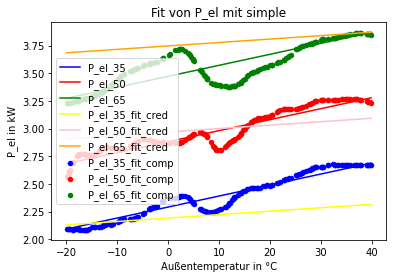

In [12]:
# P_el vergleichen
# Berechnen
data2['P_el_cred'] = func_simple(para_wpl13_cred['P_el'], data2['T_in'], data2['T_out'])
data2['P_el_comp'] = func_simple(para_wpl13_comp['P_el'], data2['T_in'], data2['T_out'])

# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_35', c='Blue', title='Fit von P_el mit simple')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_65', c='Green')
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_el_cred', kind='line', label='P_el_35_fit_cred', c='Blue')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_el_cred', kind='line', label='P_el_50_fit_cred', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_el_cred', kind='line', label='P_el_65_fit_cred', c='Green')

data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_el_comp', kind='line', label='P_el_35_fit_comp', c='Yellow')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_el_comp', kind='line', label='P_el_50_fit_comp', c='Pink')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_el_comp', kind='line', label='P_el_65_fit_comp', c='Orange')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("P_el in kW")


### Fazit für P_el: einfacher Fit (simple / _s) ist aureichend 

Text(0, 0.5, 'P_th in kW')

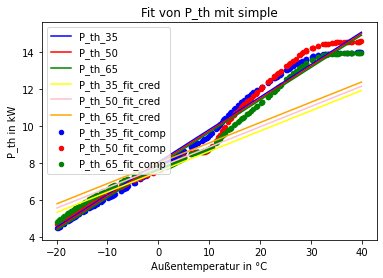

In [13]:
# P_th vergleichen
# Berechnen
data2['P_th_cred'] = func_simple(para_wpl13_cred['P_th'], data2['T_in'], data2['T_out'])
data2['P_th_comp'] = func_simple(para_wpl13_comp['P_th'], data2['T_in'], data2['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_35', c='Blue', title='Fit von P_th mit simple')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_65', c='Green')
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_th_cred', kind='line', label='P_th_35_fit_cred', c='Blue')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_th_cred', kind='line', label='P_th_50_fit_cred', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_th_cred', kind='line', label='P_th_65_fit_cred', c='Green')

data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='P_th_comp', kind='line', label='P_th_35_fit_comp', c='Yellow')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='P_th_comp', kind='line', label='P_th_50_fit_comp', c='Pink')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='P_th_comp', kind='line', label='P_th_65_fit_comp', c='Orange')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("P_th in kW")



### Fazit: Erwartungsgemäß kann kein Fit den unstetigen Verlauf richtig nachbilden. Die grundsätzliche Abhängigkeit der Heizleistung von der Außtentemperatur wird jedoch bereits mit dem einfachen Fit (simple / _s) ausreichend abgebildet, auch wenn complex2 vor allem im Bereich kalter Quelltemperaturen nochmal genauer ist.

Text(0, 0.5, 'COP in kW')

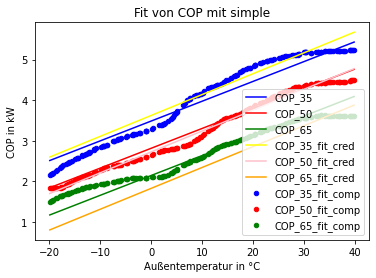

In [14]:
# COP vergleichen
# Berechnen
data2['COP_cred'] = func_simple(para_wpl13_cred['COP'], data2['T_in'], data2['T_out'])
data2['COP_comp'] = func_simple(para_wpl13_comp['COP'], data2['T_in'], data2['T_out'])

# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_35', c='Blue', title='Fit von COP mit simple')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_65', c='Green')
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='COP_cred', kind='line', label='COP_35_fit_cred', c='Blue')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='COP_cred', kind='line', label='COP_50_fit_cred', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='COP_cred', kind='line', label='COP_65_fit_cred', c='Green')

data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='COP_comp', kind='line', label='COP_35_fit_comp', c='Yellow')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='COP_comp', kind='line', label='COP_50_fit_comp', c='Pink')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='COP_comp', kind='line', label='COP_65_fit_comp', c='Orange')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("COP in kW")


### Fazit: Hier ist complex2-Fit deutlich im Vorteil. Idee könnte also sein, den COP zu fitten und mit dem Fit der elektrischen Leistung in thermische Leistung umzurechnen. Sollte sich der Gütegrad noch besser fitten lassen, als der COP, sollte man dessen Fit verwenden.

Text(0, 0.5, 'eta in kW')

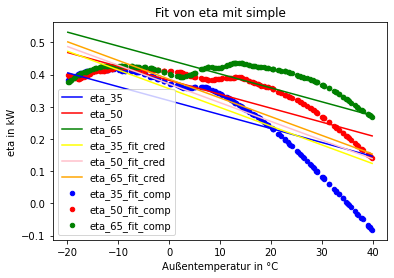

In [15]:
# eta vergleichen
# Berechnen
data2['eta_cred'] = func_simple(para_wpl13_cred['eta'], data2['T_in'], data2['T_out'])
data2['eta_comp'] = func_simple(para_wpl13_comp['eta'], data2['T_in'], data2['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_35', c='Blue', title='Fit von eta mit simple')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_50', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_65', c='Green')
data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='eta_cred', kind='line', label='eta_35_fit_cred', c='Blue')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='eta_cred', kind='line', label='eta_50_fit_cred', c='Red')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='eta_cred', kind='line', label='eta_65_fit_cred', c='Green')

data2[data2['T_out']==35].plot(ax=axes, x='T_in', y='eta_comp', kind='line', label='eta_35_fit_comp', c='Yellow')
data2[data2['T_out']==50].plot(ax=axes, x='T_in', y='eta_comp', kind='line', label='eta_50_fit_comp', c='Pink')
data2[data2['T_out']==65].plot(ax=axes, x='T_in', y='eta_comp', kind='line', label='eta_65_fit_comp', c='Orange')
axes.set_xlabel("Außentemperatur in °C")
axes.set_ylabel("eta in kW")


### Fazit: Es zeigt sich, dass nur der Fit complex2 geeignet wäre. Da ein schlechter fit schnell zu negativen Werten für den Gütegrad führen kann, wird jedoch empfohlen lieber den COP zu fitten.

# Weitere Vorgehensweise
Ziel ist es zukünftig mit den wenigen Stützstellen des Heatpumpkeymark und einem robusten/möglichst gutem Fit-Verfahren das energetische Verhalten von Wärmepumpen hinreichend genau abzubilden.

In einem weiteren Notebook wird nun überprüft, wie gut das für die hier untersuchte Stiebel Eltron WPL13 E funktioniert. Anschließend wird auf Basis der öffentlich zugänglichen Datenbank des Heatpumpkeymark einen Datenbank aufgebaut.